# Machine Learnin (Aprendizage Automatico)

Dos definiciones muy famosas de Machine Learning (ML), la primera informal y más antigua:

"el campo de estudio que da a las computadoras la capacidad de aprender sin ser programadas explícitamente". 
_Arthur Samuel_

Y la segunda más moderna: 

"Se dice que un programa de computadora aprende de la experiencia E con respecto a alguna clase de tareas T y medida de desempeño P, si su desempeño en las tareas de T, medido por P, mejora con la experiencia E. "
_Tom Mitchell_

Ejemplo: Mario bross.

E = la experiencia de jugar muchos juegos.

T = la tarea de jugar.

P = la probabilidad de que el programa llegue al último nivel.

En general, cualquier problema de aprendizaje automático se puede asignar a una de dos clasificaciones amplias:

__Arendizaje supervisado__ y __aprendizaje no supervisado__.

## Arendizaje supervisado
Se le da al algoritmo un conjunto de respuestas correctas, comunmente llamado conjunto de entrenamiento, y luego se le pide que prediga el comportamiento de datos desconocidos, teniendo la idea de que existe una relación entre la entrada y la salida.

Los problemas de aprendizaje supervisado se clasifican en problemas de "_regresión_" y "_clasificación_". En un problema de regresión, estamos tratando de predecir resultados dentro de una salida _continua_, lo que significa que estamos tratando de asignar variables de entrada a alguna función continua. En un problema de clasificación, en cambio, estamos tratando de predecir los resultados en una salida discreta. En otras palabras, estamos tratando de mapear variables de entrada en categorías discretas.

Ejemplos:

Si tenemos las notas del curso de "Física Computacinal" de los semestres inmediatamente anteriores, en función de las horas que estudian para el curso, podemos intentear predecir su las notas de algunos estudiantes este semestre.
Podríamos convertir este ejemplo en un problema de clasificación, cambiando la nota por la etiqueta de si ganó el curso o no.

### Representación del modelo
En el caso de nuestro ejemplo de las notas, los datos de entrenamiento se presentan así
| H   | N   |
|-----|-----|
| 4.2 | 2.3 |
| 7.2 | 2.6 |
| 1.1 | 0.1 |
| 3.1 | 1.1 |
| 1.4 | 0.8 |
| ... | ... |

Usaremos $x^{(i)}$ para denotar las variables de "input" (Horas de estudio por ejemplo), también llamadas características de entrada, e $y^{(i)}$ para denotar la "output" o la variable objetivo que estamos tratando de predecir (nota en el ejemplo). Un par $(x^{(i)}, y^{(i)})$, lo llamamos ejemplo de entrenamiento y $\{(x^{(i)}, y^{(i)}); i = 1,. . . , m)\}$ se denomina conjunto de entrenamiento. por ejemplo el par $(x^{(2)},y^{(2)})$ es $(7.2,2.6)$, o $y^{(3)} = 0.1$ 


Para describir el problema de aprendizaje supervisado de manera un poco más formal, nuestro objetivo es, dado un conjunto de entrenamiento, aprender una función $h: X \rightarrow Y$ de modo que $h (x)$ sea un predictor "bueno" para el valor correspondiente de $y$. Por razones históricas, esta función $h$ se denomina _hipótesis_. 

El proceso es visto gráficamente:

<!-- begin figure -->
<div id=""></div>
<img src="Fig/RepresentacionModelo.png" width=300>
<p></p>
<!-- end figure -->

### Funciones de Costo

Por simplicidad la primera hipotesis que usaremos será, la función lineal (regreción lineal). 
$$h_{\theta}(x)=\theta_0+\theta_1 x$$

Como ejemplo miremos los puntos de datos de la siguiente gráfica (que generamos usando una función lineal y números aleatorios). Lo que queremos es encontrar una función $h_{\theta}$ tal que prediga correctamente la salida, dado un dato de entrada, que en este caso será dada una cantidad de horas estudiadas, que nota tendrá el estudiante.

In [12]:
#Importamos los modulos necesarios
from random import choice
import numpy as np
import matplotlib.pyplot as plt

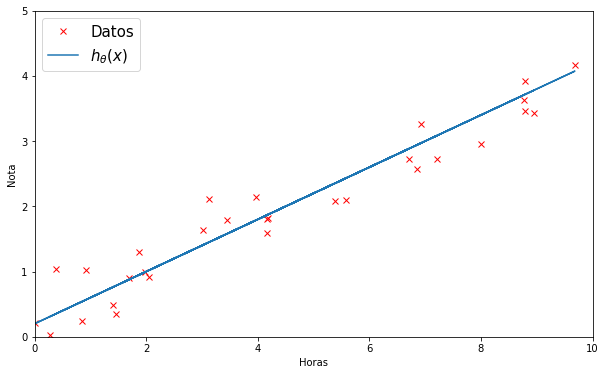

In [2]:
#Creamos un conjunto de datos
N=30
#Usando una semilla
np.random.seed(1)
x = 10*np.random.random(N)
y = (0.2+0.4*x) + 0.4*np.random.randn(N)
y2 = 0.2+0.4*x
# Grafiquemos
fig, ax = plt.subplots(figsize=(10, 6))
ax.set(xlabel="Horas",ylabel="Nota")
# los valores de x e y
ax.plot(x, y,'x',color='red',label='Datos')
ax.plot(x, y2,label=r'$h_{\theta}(x)$' )
ax.legend(fontsize=15)
ax.set_xlim([0.0, 10.0])
ax.set_ylim([0.0, 5.0])
plt.show()

En este caso tenemos la una posible hipótesis, graficada en azul. Ahora la pregunta es: ¿Cómo sabemos que esta hipotesis es la mejor?

Podemos medir la precisión de nuestra función hipótesis usando una función de costo. Esto toma una diferencia promedio (en realidad, una versión más elegante de un promedio) de todos los resultados de la hipótesis con entradas de $x$ y la salida real de $y$.

$$J(\theta_0, \theta_1) = \dfrac{1}{2m} \sum_{i = 1}^m\left(\hat{y}_{i}-y_{i}\right)^2= \dfrac{1}{2m} \sum_{i = 1}^m\left( h_{\theta}(x_{i})-y_{i}\right)^2$$ 

Esta función se denomina _"Función de error cuadrático"_ o _"Error al cuadrado medio"_. La media se reduce a la mitad por conveniencia para el cálculo del __Gradient Desent__ (Descenso de Gradiente).

Si tratamos de pensarlo en términos visuales, nuestro conjunto de datos de entrenamiento está disperso en el plano $x-y$. Estamos tratando de hacer una línea recta (definida por $h_{\theta}(x)$ que pasa a través de estos puntos de datos dispersos.

Nuestro objetivo es conseguir la mejor línea posible. La mejor línea posible será tal que las distancias verticales cuadradas promedio de los puntos dispersos desde la línea sean las menores. Idealmente, la línea debería pasar por todos los puntos de nuestro conjunto de datos de entrenamiento. En tal caso, el valor de $J(\theta_0, \theta_1) $ será 0. 

El siguiente ejemplo muestra la situación ideal en la que tenemos una función de costo de 0.

In [3]:
def J(X_train,Y_train,Theta0,Theta1, ax=None):
    '''Función de costo
    Args:
    - theta0_1 (float): parámetros
    - X_train, Y_train( numpy float array): Vector con los valores de entrenamiento
    - ax Eje sobre el que hace la media: por defecto None
    Out:
    - Valor de J (float)
    '''
    #Calculo los puntos predichos por la ecuacion de la linea,
    # con theta0 y theta 1
    Y_pred=Theta0+np.dot(Theta1,X_train)
    return np.square(np.subtract(Y_train,Y_pred)).mean(axis=ax)

Miremos las gráficas de la función $h$ y de $J$ para distintos conjuntos de parámetros (por simplicidad solo cambiare $\theta_1$) y usaremos el conjunto de datos $\{(1,1),(2,2),(3,3)\}$

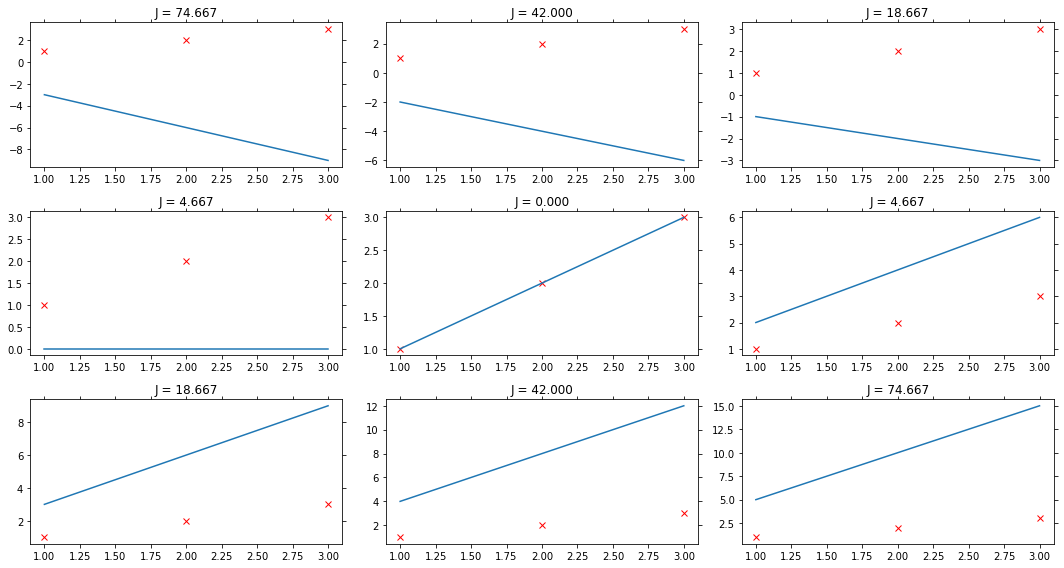

In [4]:
#Datos de entrenamiento
E = np.array([[1., 2., 3.],[1., 2., 3.]])
#Creamos los subplots para graficar
fig, ax = plt.subplots(nrows=3, ncols=3,figsize=(15, 8))
#Vector para guardar los valores de J
Errors = [];
theta1 = [];
#Usando un for 
for i in range(-3,6):
    #Para producir los indices de los subplots
    r, c = (i+3) // 3, (i) % 3
    #Linea
    h=lambda x: i*x
    #Grafico
    ax[r,c].clear()
    ax[r,c].plot(E[0],E[1],'x',color='red')#Datos
    #Hipotesis
    ax[r,c].plot(E[0],h(E[0]))
    #Pongo los titulos
    mse=J(E[0],E[1],Theta0=0,Theta1=i, ax=None)
    ax[r,c].set_title(f"J = {mse:.3f}")
    theta1.append(i)
    Errors.append(mse)
plt.tight_layout()
plt.show()

Ahora miremos la gráfica de $J(\theta)$, donde podremos encontrar que esfectivamente el mínimo de $J$ se encuentra en cuando el valor del parámetro $\theta$ es uno.

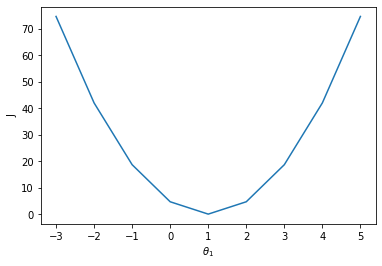

In [5]:
#Grafico
fig1, ax1 = plt.subplots()
ax1.plot(theta1, Errors )
ax1.set(xlabel=r'$\theta_1$',ylabel="J")
plt.show()

En el ejemplo anterior, tenemos una función de costo que solo tiene un parámetro, generalmente (en especial si no son regresiones lineales) las funciones tendran más de un parámetro, y esto puede complicar un analisis gráfico. Lo que se usa en estos casos lo que se quiere es un algoritmo para minimizar la función de costo.

## Gradient Desent(Descenso por gradiente)
Entonces tenemos nuestra función de hipótesis y tenemos una forma de medir qué tan bien encaja en los datos (funcion de costo). Ahora necesitamos estimar los parámetros en la función de hipótesis. Ahí es donde entra en juego el GD.

Si graficamos la función de hipótesis en función de sus parámetros $\theta_0$ y $\theta_0$ (No estamos graficando $x$ e $y$ en sí, sino el rango de parámetros de la función de hipótesis) y el costo resultante de seleccionar un conjunto particular de parámetros. Los puntos en del gráfico serán el resultado de la función de costo usando la hipótesis con esos parámetros $\theta$ específicos. El siguiente gráfico muestra una configuración de este tipo.
Tenemos una función de costo, que en general depende de $n$ parámetros $\theta$, 

<!-- begin figure -->
<div id=""></div>
<img src="Fig/GD.png" width=600>
<p></p>
<!-- end figure -->

Sabremos que hemos tenido éxito cuando nuestra función de costo esté en la parte inferior de los pozos en la gráfica, es decir, cuando su valor sea el mínimo. Las flechas rojas muestran los puntos mínimos en el gráfico.

La forma en que hacemos esto es tomando la derivada de la función de costo. La pendiente de la tangente es la derivada en ese punto y nos dará una dirección hacia la cual movernos. Realizamos pasos hacia abajo en la función de costo en la dirección con el descenso más pronunciado. El tamaño de cada paso está determinado por el parámetro $\alpha$, que se denomina tasa de aprendizaje (learning rate). Dependiendo de dónde se comience en la gráfica, se podría terminar en diferentes puntos.

El algoritmo de descenso de gradiente es repetir hasta la convergencia:

$$\theta_i:=\theta_i-\alpha\frac{\partial}{\partial\theta_i}J(\{\theta_j\}^{n}_{j=0}),~~\text{con}~i=0,1,...,n$$

Tenga en cuenta que "$:=$" significa asignación no igualdad y que las dos ecuaciones deben de ser actualizadas simultaneamente.

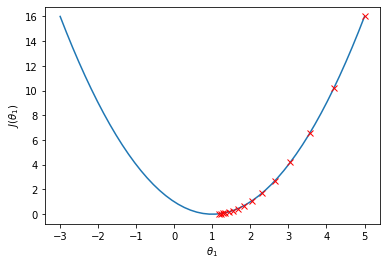

In [6]:
#Creamos un conjunto de datos
x1 = np.linspace(-3,5)
y1 = (x1-1)**2
#Como sabemos la funcion, tenemos su derivada
Jtheta= lambda x1: (x1-1)**2
dy1 = lambda x1: 2*(x1-1)
#Apliquemos el algoritmo, usando un alpha de 0.1 y comenzamos en theta_1=5
N=15
thetaVec=np.zeros(N)
thetaVec[0]=5
alpha = 0.1
for k in range(N-1):
    thetaVec[k+1]=thetaVec[k]-alpha*dy1(thetaVec[k])

# Grafiquemos
fig2, ax2 = plt.subplots()
ax2.set(xlabel=r'$\theta_1$',ylabel=r'$J(\theta_1)$')
# J(theta)
ax2.plot(x1, y1)
ax2.plot(thetaVec, Jtheta(thetaVec),'x',color='red')
plt.show()

__Funcion de Costo__
Para el caso de la regresión lineal tenemos que la derivadas son

$$\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m}\sum_{i=1}^{m}(h(\theta^{(i)}) - y^{(i)}).x_j^{(i)}$$

luego

$$\theta_0: = \theta_0 - \frac{\alpha}{m} \sum_{i=1}^{m}(h(\theta^{(i)}) - y^{(i)})$$

$$\theta_1: = \theta_1 -\frac{\alpha}{m}\sum_{i=1}^{m}(h(\theta^{(i)}) - y^{(i)}).x^{(i)}$$

Usemos, esta tecnica sobre nuestros datos de las Notas de estudiantes.

In [7]:

#Definimos la funcion de Desenso por gradiente
def GDLR(X_train,Y_train,Theta=[0,0],alpha=0.01,steps=10):
    '''Gradient Descent Lineal Regression
    Args:
    - Theta (array float): parámetros iniciales np.ones([1,2])
    - X_train, Y_train( numpy float array): Vector con los valores de entrenamiento
    - alpha (float): learning rate
    - steps (int): numero de pasos
    Out:
    - Valor de Theta actualizado (array float)
    - Historico del Thetha
    - Historico del costo
    '''
    #Numero de muestras
    m=X_train.size
    Theta_0=Theta
    histoCost=[]
    HistoTheta=[[],[]]
    for i in range(steps):
        #print(Theta_0)
        #Calculo de la hypotesis
        Hip=Theta_0[0]+X_train*Theta_0[1]
        #Calculo de la diferencia
        diff=Hip-Y_train
        #El valor del costo J
        cost=np.sum(diff**2)/(2*m) 
        histoCost.append(cost)
        HistoTheta[0].append(Theta_0[0])
        HistoTheta[1].append(Theta_0[1])
        #Los nuevos thetas
        Theta_0[0]=Theta_0[0]-(alpha/m)*np.sum(diff)
        Theta_0[1]=Theta_0[1]-(alpha/m)*np.sum(diff*X_train)

    return Theta_0,HistoTheta,histoCost

In [8]:
#En este punto corremos la funcion sobre los datos
pasos =100
theta_0, HistoTheta,HistoCosto = GDLR(x,y,alpha=0.001,Theta=[0,0],steps=pasos)

En las proximas gráficas podemos ver, la tasa de convergencia. Si usamos un $\alpha$ mayor, o menor esa tasa se verá afectada. Tambíen podemos ver como cambian los parámetros $\theta$ a medida que pasan las iteraciones. 

[]

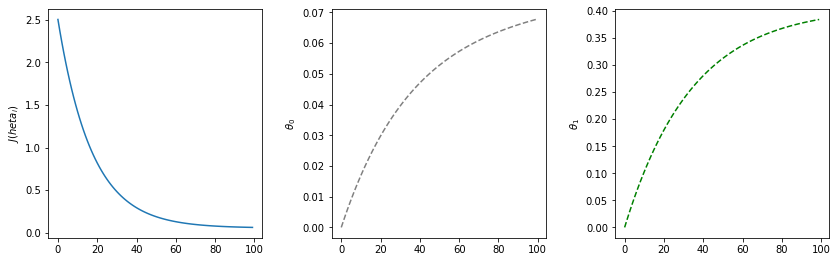

In [9]:
fig3, ax3 = plt.subplots(1,3,figsize=(12, 4))
#Pasos
p=np.linspace(0,100,len(HistoTheta[0]))
ax3[0].plot(HistoCosto)
ax3[0].set(ylabel='$J(\theta_i)$')
ax3[1].plot(HistoTheta[0],'--',color="gray")
ax3[1].set(ylabel=r'$\theta_0$')
ax3[2].plot(HistoTheta[1],'--', color="green")
ax3[2].set(ylabel=r'$\theta_1$')
fig3.tight_layout(pad=2.0)
plt.plot()

In [13]:
fig4, ax4 = plt.subplots(nrows=3, ncols=3,figsize=(15, 8))
#ax4.set(xlabel="Horas",ylabel="Nota")
#Usando un for 
for i in range(-3,6):
    #Para producir los indices de los subplots
    r, c = (i+3) // 3, (i) % 3
    #Grafico los datos
    ax4[r,c].clear()
    ax4[r,c].plot(x, y,'x',color='red',label='Datos')
    #Escojo un valor de theta
    index = np.random.randint(0,pasos)
    TH0=HistoTheta[0][index]
    TH1=HistoTheta[1][index]
    mse = HistoCosto[index]
    #Linea
    hip = lambda x : TH0+ TH1*x
    #Hipotesis
    ax4[r,c].plot(x,hip(x))
    #Pongo los titulos
    ax4[r,c].set_title(r'$\theta_0$: {:.2f},$\theta_1$: {:.2f}, J = {:.2f}'.format(TH0,TH1,mse))
plt.tight_layout()
plt.show()

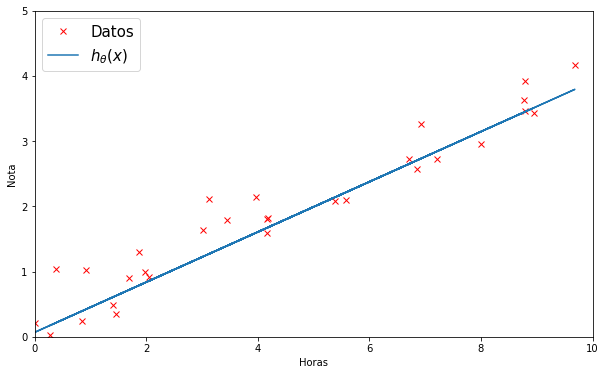

In [10]:
# Grafiquemos
fig2, ax2 = plt.subplots(figsize=(10, 6))
ax2.set(xlabel="Horas",ylabel="Nota")
# los valores de x e y
hip = lambda x : theta_0[0]+ theta_0[1]*x
ax2.plot(x, y,'x',color='red',label='Datos')
ax2.plot(x, hip(x),label=r'$h_{\theta}(x)$' )
ax2.legend(fontsize=15)
ax2.set_xlim([0.0, 10.0])
ax2.set_ylim([0.0, 5.0])
plt.show()